In [8]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt

import pythiademo
from pythiademo import PythiaDemo

%load_ext autoreload
%autoreload 2

In [3]:
# coco captioning conf check
!cat ./configs/captioning/coco/my_butd.yml

includes:
- common/defaults/configs/tasks/captioning/coco.yml
model_attributes:
  butd: &butd
    model_data_dir: data/
    metrics:
    - type: caption_bleu4
    losses:
    - type: caption_cross_entropy
    classifier:
      type: language_decoder
      params:
        dropout: 0.5
        hidden_dim: 1024
        feature_dim: 2048
        fc_bias_init: 0
    image_feature_embeddings:
    - modal_combine:
        type: top_down_attention_lstm
        params:
          dropout: 0.5
          hidden_dim: 1024
          attention_dim: 1024
      normalization: softmax
      transform:
        type: linear
        params:
          out_dim: 1
    image_feature_dim: 2048
    embedding_dim: 300
    image_feature_encodings:
    - type: finetune_faster_rcnn_fpn_fc7
      params:
        bias_file: detectron/fc6/fc7_b.pkl
        weights_file: detectron/fc6/fc7_w.pkl
    inference:
      type: greedy
optimizer_attributes:
  type: Adamax
  params:
    eps: 1.0e-08
    lr: 0.01
    weight_decay

In [5]:
!cat pythia/common/defaults/configs/tasks/captioning/coco.yml

task_attributes:
    captioning:
        datasets:
        - coco
        dataset_size_proportional_sampling: true
        dataset_attributes:
            coco:
                data_root_dir: data
                image_depth_first: false
                fast_read: false
                image_features:
                    train:
                    - coco/detectron_fix_100/fc6/train_val_2014
                    val:
                    - coco/detectron_fix_100/fc6/train_val_2014
                    test:
                    - coco/detectron_fix_100/fc6/train_val_2014
                imdb_files:
                    train:
                    - imdb/coco_captions/imdb_karpathy_train.npy
                    val:
                    - imdb/coco_captions/imdb_karpathy_val.npy
                    test:
                    - imdb/coco_captions/imdb_karpathy_test.npy
                features_max_len: 100
                processors:
                  text_processor:
                    type: voc

In [ ]:
vizwiz_yml = 
"""
task_attributes:
    captioning:
        datasets:
        - vizwiz
        dataset_size_proportional_sampling: true
        dataset_attributes:
            vizwiz:
                data_root_dir: data
                image_depth_first: false
                fast_read: false
                image_features:
                    train:
                    - coco/detectron_fix_100/fc6/train_val_2014
                    val:
                    - coco/detectron_fix_100/fc6/train_val_2014
                    test:
                    - coco/detectron_fix_100/fc6/train_val_2014
                imdb_files:
                    train:
                    - imdb/coco_captions/imdb_karpathy_train.npy
                    val:
                    - imdb/coco_captions/imdb_karpathy_val.npy
                    test:
                    - imdb/coco_captions/imdb_karpathy_test.npy
                features_max_len: 100
                processors:
                  text_processor:
                    type: vocab
                    params:
                      max_length: 52
                      vocab:
                        type: intersected
                        embedding_name: glove.6B.300d
                        vocab_file: vocabs/vocabulary_captioning_thresh5.txt
                      preprocessor:
                        type: simple_sentence
                        params: {}
                  caption_processor:
                    type: caption
                    params:
                      vocab:
                        type: intersected
                        embedding_name: glove.6B.300d
                        vocab_file: vocabs/vocabulary_captioning_thresh5.txt
                min_captions_per_img: 5
                return_info: false
                # Return OCR information
                use_ocr: false
                # Return spatial information of OCR tokens if present
                use_ocr_info: false
training_parameters:
    monitored_metric: coco_caption_bleu4
    metric_minimize: false
"""

tmp_coco_train_data shape: (100, 2048)


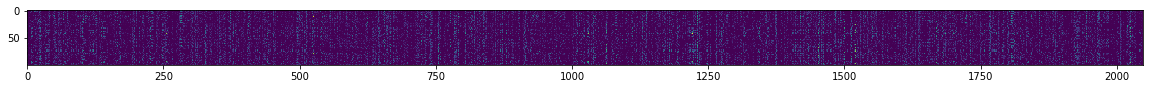

In [12]:
tmp_coco_train_data = np.load("pythia/data/coco/detectron_fix_100/fc6/train_val_2014/COCO_train2014_000000577795.npy")
print(f"tmp_coco_train_data shape: {tmp_coco_train_data.shape!r}")
fig = plt.figure(figsize=(20, 20))
plt.imshow(tmp_coco_train_data)

In [28]:
# 이건 대체 무슨 이미지지?
tmp_coco_train_data[0].reshape()

(2048,)

In [31]:
# 이미지 자체는 아닌거 같고,
47*47

2209

In [ ]:
# 아... Fast RCNN 타고 나온 2048d 피쳐구나...
# 그럼 vizwiz 이미지도 이거처럼 바꿔보자... 

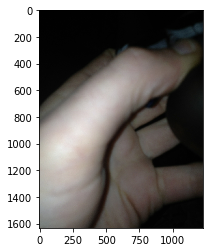

In [33]:
# vizwiz 이미지
vizwiz_train_paths = glob("./pythia/data/vizwiz/train/*")
vizwiz_val_paths = glob("./pythia/data/vizwiz/val/*")
vizwiz_test_paths = glob("./pythia/data/vizwiz/test/*")
plt.imshow(plt.imread(vizwiz_train_paths[0]))

In [ ]:
# 어떻게 매칭시켜야할까?

사이트들 찾아봄: 
* https://github.com/facebookresearch/pythia/issues/175
* https://github.com/Yinan-Zhao/vizwiz-caption    

In [ ]:
# pythia_captioning_demo.ipynb 에서 PythiaDemo class 때어내서 파일로 저장 후 읽어옴

In [40]:
!ls 

CODE_OF_CONDUCT.md    docs			    review.ipynb
CONTRIBUTING.md       model_data		    run_coco_inference.sh
LICENSE		      nohup.out			    run_coco_train.sh
README.md	      pythia			    save
Vizwiz_dataset.ipynb  pythia.egg-info		    setup.py
configs		      pythia_captioning_demo.ipynb  tests
content		      pythiademo.py		    tools
demo		      requirements.txt


In [2]:
demo = PythiaDemo()

/tf/notebooks/jwhwang/vqa/pythia/pythiademo.py:55: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


In [11]:
# https://github.com/facebookresearch/pythia/issues/175 참조하였음


#Extract the features
detectronFeatures = demo.get_detectron_features(vizwiz_train_paths[0])
det_feature_array = np.asarray(detectronFeatures.cpu())

# #Saving the features into the correct location
# detName = (whatever your naming convention is)
# np.save(detName, det_feature_array)

In [12]:
# 오 coco랑 모양이 똑같아 졌어
det_feature_array.shape

(100, 2048)

In [21]:
!mkdir -p pythia/data/vizwiz/train_npy
!mkdir -p pythia/data/vizwiz/val_npy
!mkdir -p pythia/data/vizwiz/test_npy

In [30]:
# 이제 전체 path돌면서 이미지를 npy로 저장시키자

# 저장 될 vizwiz npy path 셋팅, 우선 train
VIZWIZ_NPY_DATASET_BASE_FOLDER = "pythia/data/vizwiz"


def save_img_to_npy(subfolder_name:str, path:str) -> None:
    detectronFeatures = demo.get_detectron_features(path)
    det_feature_array = np.asarray(detectronFeatures.cpu())
    
    #Saving the features into the correct location
    detName = os.path.split(path)[-1].split(".")[0]+".npy"
    detName = os.path.join(VIZWIZ_NPY_DATASET_BASE_FOLDER, subfolder_name, detName)
    np.save(detName, det_feature_array)

In [23]:
save_img_to_npy('train_npy', vizwiz_train_paths[0])

In [24]:
!ls -alh pythia/data/vizwiz/train_npy/

total 804K
drwxr-xr-x 2 root root   47 Mar 24 16:22 .
drwxr-xr-x 9 root root  324 Mar 24 16:21 ..
-rw-r--r-- 1 root root 801K Mar 24 16:22 VizWiz_train_00013450.npy


In [25]:
# 오... 용량도 800K로 비슷하네, 제대로 됐나보다.
!ls -alth pythia/data/coco/detectron_fix_100/fc6/train_val_2014

total 95G
drwxr-xr-x 4 root root   56 Mar 19 11:02 ..
drwxr-xr-x 2 root root 5.8M Mar 19 11:02 .
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581904.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581906.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581909.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581921.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581884.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581900.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581903.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581881.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581882.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581860.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581873.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000581880.npy
-rw-r--r-- 1 root root 801K

-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578072.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578060.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578063.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578046.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578047.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578055.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578056.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578030.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578037.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578041.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578023.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578026.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000578009.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train

-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536896.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536900.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536902.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536920.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536834.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536842.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536855.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536884.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536827.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536830.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536808.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536820.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000536823.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train

-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497207.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497211.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497216.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497194.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497199.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497202.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497179.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497167.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497172.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497177.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497160.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497162.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train2014_000000497113.npy
-rw-r--r-- 1 root root 801K Mar 19 11:02 COCO_train

-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462944.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462955.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462911.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462925.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462901.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462908.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462878.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462879.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462880.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462899.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462849.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462860.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000462872.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train

-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421406.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421421.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421432.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421387.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421389.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421393.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421382.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421383.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421384.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421364.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421367.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421380.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000421341.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train

-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390644.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390646.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390593.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390594.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390597.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390608.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390575.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390581.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390567.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390571.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390552.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390559.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000390565.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train

-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363469.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363474.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363483.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363486.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363464.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363468.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363435.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363455.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363426.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363433.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363423.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363407.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train2014_000000363410.npy
-rw-r--r-- 1 root root 801K Mar 19 11:01 COCO_train

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
[save_img_to_npy('train_npy', path) for path in vizwiz_train_paths]

In [ ]:
[save_img_to_npy('val_npy', path) for path in vizwiz_val_paths]
[save_img_to_npy('test_npy', path) for path in vizwiz_test_paths]

In [35]:
len(vizwiz_val_paths), len(vizwiz_test_paths)

(7750, 8000)

In [37]:
glob("./pythia/data/vizwiz/annotations/*")

['./pythia/data/vizwiz/annotations/test.json',
 './pythia/data/vizwiz/annotations/val.json',
 './pythia/data/vizwiz/annotations/train.json']

In [38]:
!cat ./pythia/data/vizwiz/annotations/train.json

{"info": {"description": "This dataset contains crowdsourced captions of images from VizWiz datasets. This file contains the train partition.", "license": {"url": "https://creativecommons.org/licenses/by/4.0/", "name": "Attribution 4.0 International (CC BY 4.0)"}, "url": "https://vizwiz.org", "version": "VizWiz-Captions 1.0", "year": 2019, "contributor": "VizWiz-Captions Consortium", "date_created": "2019-12-23"}, "images": [{"file_name": "VizWiz_train_00000000.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00000000.jpg", "id": 0, "text_detected": true}, {"file_name": "VizWiz_train_00000001.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00000001.jpg", "id": 1, "text_detected": true}, {"file_name": "VizWiz_train_00000002.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00000002.jpg", "id": 2, "text_detected": true}, {"file_name": "VizWiz_train_00000003.jpg", "vi

pg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00002414.jpg", "id": 2414, "text_detected": true}, {"file_name": "VizWiz_train_00002415.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00002415.jpg", "id": 2415, "text_detected": false}, {"file_name": "VizWiz_train_00002416.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00002416.jpg", "id": 2416, "text_detected": false}, {"file_name": "VizWiz_train_00002417.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00002417.jpg", "id": 2417, "text_detected": false}, {"file_name": "VizWiz_train_00002418.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00002418.jpg", "id": 2418, "text_detected": true}, {"file_name": "VizWiz_train_00002419.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00002419.jpg", "id

_00004975.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00004975.jpg", "id": 4975, "text_detected": true}, {"file_name": "VizWiz_train_00004976.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00004976.jpg", "id": 4976, "text_detected": false}, {"file_name": "VizWiz_train_00004977.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00004977.jpg", "id": 4977, "text_detected": false}, {"file_name": "VizWiz_train_00004978.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00004978.jpg", "id": 4978, "text_detected": false}, {"file_name": "VizWiz_train_00004979.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00004979.jpg", "id": 4979, "text_detected": true}, {"file_name": "VizWiz_train_00004980.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_0000498

0007351.jpg", "id": 7351, "text_detected": false}, {"file_name": "VizWiz_train_00007352.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00007352.jpg", "id": 7352, "text_detected": true}, {"file_name": "VizWiz_train_00007353.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00007353.jpg", "id": 7353, "text_detected": false}, {"file_name": "VizWiz_train_00007354.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00007354.jpg", "id": 7354, "text_detected": false}, {"file_name": "VizWiz_train_00007355.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00007355.jpg", "id": 7355, "text_detected": true}, {"file_name": "VizWiz_train_00007356.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00007356.jpg", "id": 7356, "text_detected": true}, {"file_name": "VizWiz_train_00007357.jpg", "vizwiz_url": 

g", "id": 9796, "text_detected": true}, {"file_name": "VizWiz_train_00009797.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00009797.jpg", "id": 9797, "text_detected": false}, {"file_name": "VizWiz_train_00009798.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00009798.jpg", "id": 9798, "text_detected": false}, {"file_name": "VizWiz_train_00009799.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00009799.jpg", "id": 9799, "text_detected": true}, {"file_name": "VizWiz_train_00009800.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00009800.jpg", "id": 9800, "text_detected": true}, {"file_name": "VizWiz_train_00009801.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00009801.jpg", "id": 9801, "text_detected": true}, {"file_name": "VizWiz_train_00009802.jpg", "vizwiz_url": "https://iv

utexas.edu/VizWiz_visualization_img/VizWiz_train_00012035.jpg", "id": 12035, "text_detected": true}, {"file_name": "VizWiz_train_00012036.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00012036.jpg", "id": 12036, "text_detected": true}, {"file_name": "VizWiz_train_00012037.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00012037.jpg", "id": 12037, "text_detected": true}, {"file_name": "VizWiz_train_00012038.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00012038.jpg", "id": 12038, "text_detected": true}, {"file_name": "VizWiz_train_00012039.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00012039.jpg", "id": 12039, "text_detected": false}, {"file_name": "VizWiz_train_00012040.jpg", "vizwiz_url": "https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00012040.jpg", "id": 12040, "text_detected": false}, {"

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ns and bottles.", "id": 67735, "text_detected": true}, {"is_precanned": false, "image_id": 13547, "is_rejected": false, "caption": "A bottle of coca cola has a dark liquid in it.", "id": 67736, "text_detected": true}, {"is_precanned": false, "image_id": 13547, "is_rejected": false, "caption": "Pictured is a full bottle of Coca Cola soda.", "id": 67737, "text_detected": true}, {"is_precanned": false, "image_id": 13547, "is_rejected": false, "caption": "A 2 liter bottle of Coca Cola in front of a cluttered surface.", "id": 67738, "text_detected": true}, {"is_precanned": false, "image_id": 13547, "is_rejected": false, "caption": "A 2 liter bottle of Coke sitting on a table.", "id": 67739, "text_detected": true}, {"is_precanned": false, "image_id": 13548, "is_rejected": false, "caption": "A green led backlit screen displays the distance ran on the treadmill.", "id": 67740, "text_detected": true}, {"is_precanned": false, "image_id": 13548, "is_rejected": false, "caption": "A display of dist

text_detected": true}, {"is_precanned": false, "image_id": 13788, "is_rejected": false, "caption": "A blue fabric against a golden background with several label descriptions.", "id": 68941, "text_detected": true}, {"is_precanned": false, "image_id": 13788, "is_rejected": false, "caption": "dolce & gabbana perfume, still in the box, fragrance is \"bleu classic\"", "id": 68942, "text_detected": true}, {"is_precanned": false, "image_id": 13788, "is_rejected": false, "caption": "A blue box of Dolce and Gabbana Bleu classic cologne", "id": 68943, "text_detected": true}, {"is_precanned": false, "image_id": 13788, "is_rejected": false, "caption": "some type of cigarettes that are still in a package", "id": 68944, "text_detected": true}, {"is_precanned": false, "image_id": 13789, "is_rejected": false, "caption": "a package of dry milk on top of counter top", "id": 68945, "text_detected": true}, {"is_precanned": true, "image_id": 13789, "is_rejected": true, "caption": "Quality issues are too se

 frosting", "id": 70003, "text_detected": true}, {"is_precanned": true, "image_id": 14000, "is_rejected": false, "caption": "Quality issues are too severe to recognize visual content.", "id": 70004, "text_detected": true}, {"is_precanned": false, "image_id": 14001, "is_rejected": false, "caption": "Package of frozen food lying on a horizontal surface.", "id": 70005, "text_detected": true}, {"is_precanned": false, "image_id": 14001, "is_rejected": false, "caption": "A packaged dinner containing shepherd's pie of the President's Choice brand", "id": 70006, "text_detected": true}, {"is_precanned": false, "image_id": 14001, "is_rejected": false, "caption": "a box of cornbread mash potatoes and meat shepherds pie.", "id": 70007, "text_detected": true}, {"is_precanned": false, "image_id": 14001, "is_rejected": false, "caption": "a box containing microwaveable meal containing shepherd's pie", "id": 70008, "text_detected": true}, {"is_precanned": false, "image_id": 14001, "is_rejected": false,

lse, "image_id": 14214, "is_rejected": false, "caption": "A keyboard with black keys and a white background.", "id": 71071, "text_detected": true}, {"is_precanned": false, "image_id": 14214, "is_rejected": false, "caption": "A keyboard that is white with black keys.", "id": 71072, "text_detected": true}, {"is_precanned": false, "image_id": 14214, "is_rejected": false, "caption": "White and black wireless Logitech keyboard on top of a white and blue patterned surface.", "id": 71073, "text_detected": true}, {"is_precanned": false, "image_id": 14214, "is_rejected": false, "caption": "a keyboard that is black and white logitech", "id": 71074, "text_detected": true}, {"is_precanned": false, "image_id": 14215, "is_rejected": false, "caption": "White plastic bag on top of a white desk", "id": 71075, "text_detected": false}, {"is_precanned": false, "image_id": 14215, "is_rejected": false, "caption": "A can of food being shaken out of a clear plastic bag.", "id": 71076, "text_detected": true}, 

ecanned": false, "image_id": 14511, "is_rejected": false, "caption": "A green bottle laying on a cream colored counter", "id": 72559, "text_detected": true}, {"is_precanned": false, "image_id": 14512, "is_rejected": false, "caption": "A ruffled and loosely laying grey fabric blanket.", "id": 72560, "text_detected": false}, {"is_precanned": false, "image_id": 14512, "is_rejected": false, "caption": "Layers of grey fabric that is ruffled and on top of each other.", "id": 72561, "text_detected": false}, {"is_precanned": false, "image_id": 14512, "is_rejected": false, "caption": "Some layered fabric which seems to be hanging.", "id": 72562, "text_detected": false}, {"is_precanned": false, "image_id": 14512, "is_rejected": false, "caption": "A gray piece of cloth has frills all over it", "id": 72563, "text_detected": false}, {"is_precanned": false, "image_id": 14512, "is_rejected": false, "caption": "A wrinkled and ruffled piece of grey fabric.", "id": 72564, "text_detected": false}, {"is_p

e_id": 14797, "is_rejected": false, "caption": "A picture of vines growing on a wall outside.", "id": 73988, "text_detected": false}, {"is_precanned": false, "image_id": 14797, "is_rejected": false, "caption": "The side of a house with a concrete block and ivy growing up on the side", "id": 73989, "text_detected": false}, {"is_precanned": false, "image_id": 14798, "is_rejected": false, "caption": "Ace of spades playing card produced by Bicycle brand", "id": 73990, "text_detected": true}, {"is_precanned": false, "image_id": 14798, "is_rejected": false, "caption": "A deck of Bicycle cards, with the ace of spades facing up", "id": 73991, "text_detected": true}, {"is_precanned": false, "image_id": 14798, "is_rejected": false, "caption": "A deck of cards taken out of the box is laid on a mat on a a table and the ace of clubs is face up on top.", "id": 73992, "text_detected": true}, {"is_precanned": false, "image_id": 14798, "is_rejected": false, "caption": "A deck of playing cards with a bl

d": false, "caption": "A video game case facing backward resting on a person's legs.", "id": 75472, "text_detected": true}, {"is_precanned": false, "image_id": 15094, "is_rejected": false, "caption": "The back of a video game case on someone's lap", "id": 75473, "text_detected": true}, {"is_precanned": false, "image_id": 15094, "is_rejected": false, "caption": "DVD case with label upside down on top of an individual's lap who is wearing denim shorts.", "id": 75474, "text_detected": true}, {"is_precanned": false, "image_id": 15095, "is_rejected": false, "caption": "a person holding a blue plastic headband", "id": 75475, "text_detected": false}, {"is_precanned": false, "image_id": 15095, "is_rejected": false, "caption": "A hand holding a blue boomerang is in front of a bed with a patchwork quilt.", "id": 75476, "text_detected": false}, {"is_precanned": false, "image_id": 15095, "is_rejected": false, "caption": "A wireless speaking device that wraps around the neck is held in someone's ha

tected": true}, {"is_precanned": false, "image_id": 15382, "is_rejected": false, "caption": "A Harry Potter \"The Prisoner of Azkaban\" box to the right of a blue object with a picture and the word \"Downtown\" on it.", "id": 76910, "text_detected": true}, {"is_precanned": false, "image_id": 15382, "is_rejected": false, "caption": "A capture of a well packed baby diapers but not well captured by the eye of the camera.", "id": 76911, "text_detected": true}, {"is_precanned": false, "image_id": 15382, "is_rejected": false, "caption": "Board games and books on a shelf underneath a window.", "id": 76912, "text_detected": true}, {"is_precanned": false, "image_id": 15382, "is_rejected": false, "caption": "A Harry Potter book set is sitting on a shelf with other books and toys around and beneath it.", "id": 76913, "text_detected": true}, {"is_precanned": false, "image_id": 15382, "is_rejected": false, "caption": "A Harry Potter book sits on a red table alongside a large blue box.", "id": 76914

 cabinet and a brown area rug.", "id": 78323, "text_detected": false}, {"is_precanned": false, "image_id": 15664, "is_rejected": false, "caption": "A room with a patterned floor, a plastic bag, and an orange plastic item.", "id": 78324, "text_detected": false}, {"is_precanned": false, "image_id": 15665, "is_rejected": false, "caption": "The Nutrition Facts label on the back of a can of unknown food.", "id": 78325, "text_detected": true}, {"is_precanned": false, "image_id": 15665, "is_rejected": false, "caption": "A tin can of food with the Nutritional Facts panel.", "id": 78326, "text_detected": true}, {"is_precanned": false, "image_id": 15665, "is_rejected": false, "caption": "Aluminum canned food with nutrition facts showing a half cup serving size and 50 calories per serving.", "id": 78327, "text_detected": true}, {"is_precanned": false, "image_id": 15665, "is_rejected": false, "caption": "looks like a can on it's side on a stove top", "id": 78328, "text_detected": true}, {"is_preca

drawers and the leg of someone wearing jeans.", "id": 79745, "text_detected": true}, {"is_precanned": false, "image_id": 15949, "is_rejected": false, "caption": "A bottle of lotion is being held in the foreground, and in the background is a white dresser with five drawers and a person's leg with jeans on it and a bare foot.", "id": 79746, "text_detected": true}, {"is_precanned": false, "image_id": 15949, "is_rejected": false, "caption": "a pink bottle of Country Chic body lotion", "id": 79747, "text_detected": true}, {"is_precanned": false, "image_id": 15949, "is_rejected": false, "caption": "A person is holding a pink bottle of lotion with another person in the background.", "id": 79748, "text_detected": true}, {"is_precanned": false, "image_id": 15949, "is_rejected": false, "caption": "A picture of the food is on the packaging.", "id": 79749, "text_detected": true}, {"is_precanned": false, "image_id": 15950, "is_rejected": false, "caption": "A grey box is shown inside a closet.", "id

se, "caption": "A small baby animal is biting a person's finger", "id": 81157, "text_detected": false}, {"is_precanned": false, "image_id": 16231, "is_rejected": false, "caption": "some type of dog that is playing with their owner", "id": 81158, "text_detected": false}, {"is_precanned": false, "image_id": 16231, "is_rejected": false, "caption": "A small puppy laying on it's side with a hand under it's chin.", "id": 81159, "text_detected": false}, {"is_precanned": false, "image_id": 16232, "is_rejected": false, "caption": "A large package of Starbuck's dark espresso roast whole beans.", "id": 81160, "text_detected": true}, {"is_precanned": false, "image_id": 16232, "is_rejected": false, "caption": "A bag of Starbucks dark espresso roast coffee beans.", "id": 81161, "text_detected": true}, {"is_precanned": false, "image_id": 16232, "is_rejected": false, "caption": "A bag of Starbucks Dark Espresso Roast whole bean coffee", "id": 81162, "text_detected": true}, {"is_precanned": false, "ima

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

